In [1]:
source(paste0(file.path("/","mnt","hadoop_tmp","working","Rcode"),"/",list.files(file.path("/","mnt","hadoop_tmp","working","Rcode"),pattern = "_proteome.r$")))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: httr

Loading required package: stringr

Loading required package: pbapply

Loading required package: reshape2


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [2]:
getwd()
path <- file.path("/","mnt","hadoop_tmp","working","2022 YEO","2023_BV2_siIft88_CD81IP_Lysate_220818")
rawPD<-list.files(path, pattern = "_Proteins.txt$")
#infoPD<-list.files(path, pattern = "_InputFiles.txt$")
print(rawPD)
#path1 <- system.file("extdata", package="wrProteo")
#fiNaPd <- "pxd001819_PD24_Proteins.txt.gz"

[1] "/mnt/hadoop_tmp/working/2022 YEO/2023_BV2_siIft88_CD81IP_Lysate_220818"

[1] "230314_220818_BV_siIft88_LysateCD81IP-(1)_Proteins.txt"


In [3]:
datafromPD<-lapply(rawPD, function(file){
  return(fread(paste0(path,"/",file)))
})



require(stringr)
for(i in seq_len(length(datafromPD))){
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[ ]",".")
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[-]","_")
}

counts<-lapply(datafromPD, function(data){
  cts<-data %>% base::subset(select = c("Accession",grep("^Abundances.Normalized.", colnames(data), value=TRUE))) 
  return(cts)
})

In [4]:
k = 1 # select number number from "print(rawPD)"
colnames(counts[[k]])

[1] "Accession"                                     
 [2] "Abundances.Normalized.F1.Sample.Con"           
 [3] "Abundances.Normalized.F2.Sample.Con"           
 [4] "Abundances.Normalized.F3.Sample.Con"           
 [5] "Abundances.Normalized.F4.Sample.Con"           
 [6] "Abundances.Normalized.F5.Sample.Con_Abeta"     
 [7] "Abundances.Normalized.F6.Sample.Con_Abeta"     
 [8] "Abundances.Normalized.F7.Sample.Con_Abeta"     
 [9] "Abundances.Normalized.F8.Sample.Con_Abeta"     
[10] "Abundances.Normalized.F9.Sample.siIft88"       
[11] "Abundances.Normalized.F10.Sample.siIft88"      
[12] "Abundances.Normalized.F11.Sample.siIft88"      
[13] "Abundances.Normalized.F12.Sample.siIft88"      
[14] "Abundances.Normalized.F13.Sample.siIft88_Abeta"
[15] "Abundances.Normalized.F14.Sample.siIft88_Abeta"
[16] "Abundances.Normalized.F15.Sample.siIft88_Abeta"
[17] "Abundances.Normalized.F16.Sample.siIft88_Abeta"

In [5]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Control"=subset(counts[[k]], select = c("Accession",grep("_Con$", colnames(counts[[k]]), value=TRUE))),
              "Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88"=subset(counts[[k]], select = c("Accession",grep("_siIft88", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))

Loading required package: ggVennDiagram



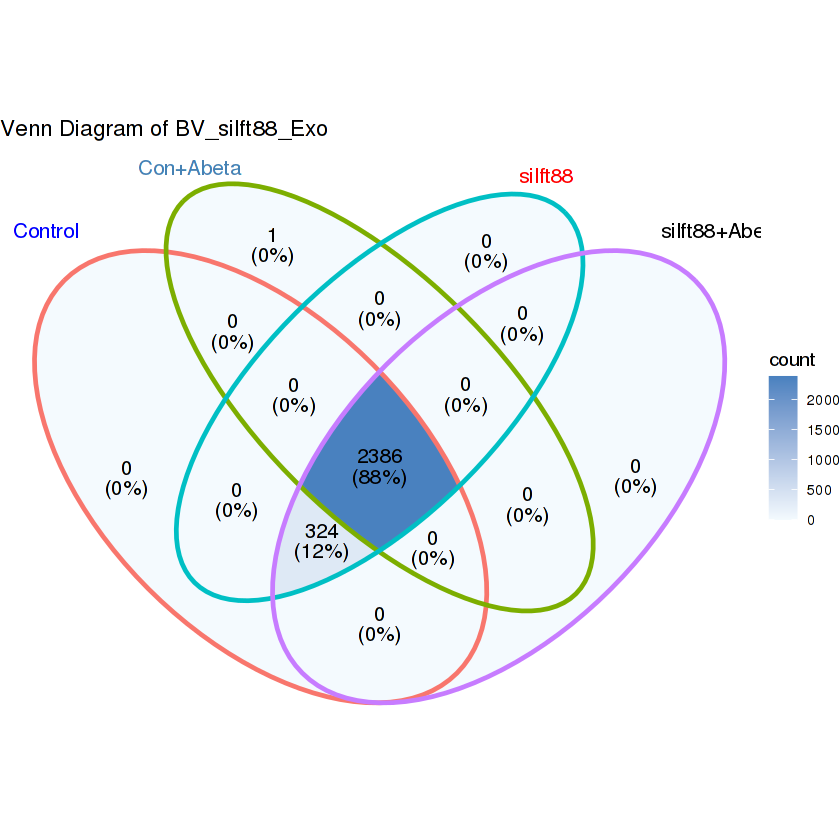

In [6]:
y <- list("Control"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "Con+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88"= y.count[[3]]$Accession[unique(c(unlist(apply(y.count[[3]], 2, function(x) which(!is.na(x)))[-1])))],
           "siIft88+Abeta"= y.count[[4]]$Accession[unique(c(unlist(apply(y.count[[4]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="steelblue","C" = "red", "'D" = "black") ,
          set_color = c("A" = "blue","B" ="steelblue", "C" = "red", "D" = "black")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_vennALL.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)

In [7]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))

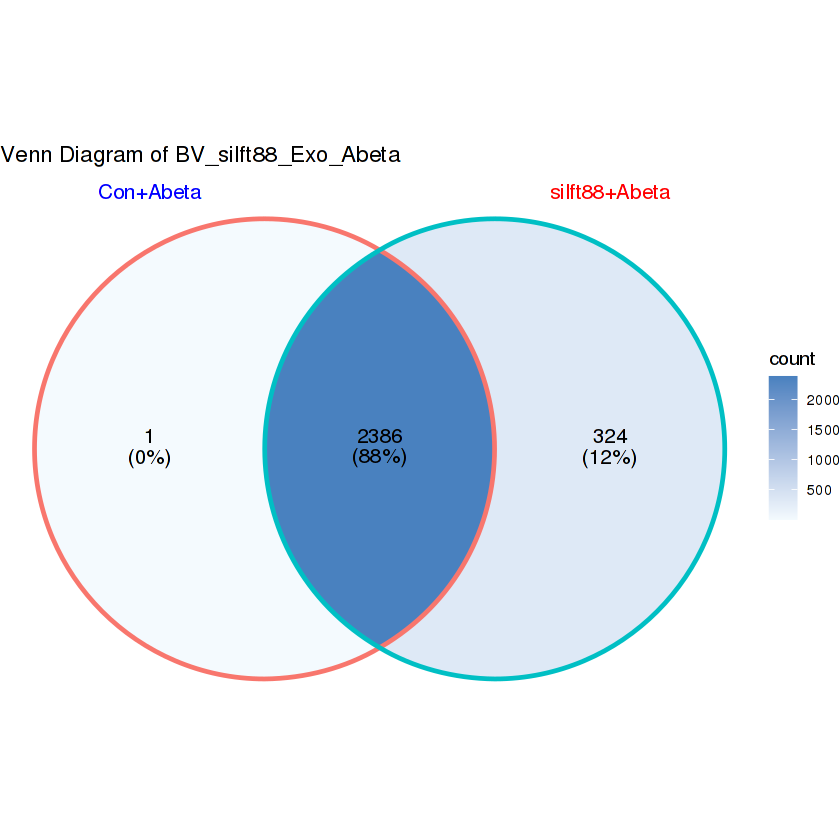

In [8]:
y <- list("Con+Abeta"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="red") ,
          set_color = c("A" = "blue","B" ="red")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo_Abeta")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_vennAbeta.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)

In [9]:
resultUNIPROT <- pbapply::pblapply(datafromPD[[k]]$Accession,function(ids){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    data <- uniprot_mapping(ids)
    content(data, as= "text", encoding = 'UTF-8')
    res<-unlist(str_split(unlist(str_split(unlist(str_split(content(data, as= "text", encoding = 'UTF-8'),"\\t")),"\\n"))[4]," "))[1]
    return(res)
  })
  
  results_from_uniprot <- data.frame('Accession' = datafromPD[[k]]$Accession,  #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
                                     'Gene.names' = unlist(resultUNIPROT))
  require(stringi)
  # str_sub(datafromPD[[k]]$Description[1], #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "GN=")[2]+1, #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "PE=")[1]-2) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  # seq_len(length(dataPD$Description))
  result<-lapply(datafromPD[[k]]$Description, function(desc){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    # str_sub(grep("GN=",unlist(str_split(desc, " ")), value = TRUE),start = 4L)
    str_sub(desc, 
            str_locate(desc,pattern = "GN=")[2]+1,
            str_locate(desc,pattern = "PE=")[1]-2)
  })
  
  result<-make.unique(unlist(result))
  
  results_from_datasheet <- data.frame('Protein.IDs' = datafromPD[[k]]$"Accession",  'Gene.names' = result) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  results_from_uniprot <- na.omit(results_from_uniprot)
  results_from_uniprot$Gene.names[which(results_from_uniprot$Gene.names=="")] <- result[which(datafromPD[[k]]$"Accession" %in% results_from_uniprot$Accession[which(results_from_uniprot$Gene.names=="")])]
  
  dat<-merge(counts[[k]], results_from_uniprot, by = "Accession")
  
  data_unique <- make_unique(dat, "Gene.names", "Accession", delim = ";")

  |::::::::::::::::::::::::::::::::::::::::::::::::::| 100%


Loading required package: stringi



In [11]:
############# Part 2. Not imputed
data <-  merge(datafromPD[[k]], results_from_uniprot, by = "Accession")

data.merged_neo <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.Weight.|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE)))

colnames(data.merged_neo)

[1] "Gene.names"                                          
 [2] "Accession"                                           
 [3] "Abundance.Ratio.log2.Con_Abeta..Con"                 
 [4] "Abundance.Ratio.log2.siIft88..Con"                   
 [5] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
 [6] "Abundance.Ratio.log2.siIft88_Abeta..siIft88"         
 [7] "Abundance.Ratio.Adj.P_Value.Con_Abeta..Con"          
 [8] "Abundance.Ratio.Adj.P_Value.siIft88..Con"            
 [9] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[10] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..siIft88"  
[11] "Abundance.Ratio.Weight.Con_Abeta..Con"               
[12] "Abundance.Ratio.Weight.siIft88..Con"                 
[13] "Abundance.Ratio.Weight.siIft88_Abeta..Con_Abeta"     
[14] "Abundance.Ratio.Weight.siIft88_Abeta..siIft88"

In [60]:
data_export <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.P_Value|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE))) 
data_exports <-subset(data_export, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data_export), value = TRUE)))

require(xlsx)
write.xlsx(data_exports, paste0(path,"/results/Figure7f_BVsiIft88_CD81IP_Lysate.xlsx"))

Loading required package: xlsx



In [12]:
objDat <- subset(data.merged_neo, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data.merged_neo), value = TRUE)))

print(colnames(objDat))

colnames(objDat)<- c('Gene.names','Accession','Abundance.Ratio.log2','Abundance.Ratio.P_Value','Abundance.Ratio.Weight')


[1] "Gene.names"                                          
[2] "Accession"                                           
[3] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
[4] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[5] "Abundance.Ratio.Weight.siIft88_Abeta..Con_Abeta"     


In [13]:
insGenes <- objDat %>% dplyr::filter(Abundance.Ratio.log2 > 0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)
insGenes.n <- objDat %>% dplyr::filter(Abundance.Ratio.log2 < -0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)

In [70]:
na.omit(insGenes) %>% length()
na.omit(insGenes.n) %>% length()

[1] 147

[1] 113

In [14]:
library(enrichR)
library(httr)
# Check available databases to perform enrichment (then choose one)
databases <- enrichR::listEnrichrDbs()$libraryName

# insGenes <- mg.subset.DE[[id]] %>% dplyr::filter(p_val < 0.01  & avg_log2FC < -0.25) %>% rownames()



Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



In [15]:
enrich_results <- enrichr(genes = insGenes, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])
enrich_results.n <- enrichr(genes = insGenes.n, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])

Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.


In [16]:
enrich_result.p <- rbind(cbind(enrich_results[[1]],"group"="KEGG"),
                         cbind(enrich_results[[2]],"group"="reactome"),
                         cbind(enrich_results[[3]],"group"="GO-BP"),
                         cbind(enrich_results[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.p$Term

[1] "Protein processing in endoplasmic reticulum"                                                     
  [2] "Regulation of actin cytoskeleton"                                                                
  [3] "Glycolysis / Gluconeogenesis"                                                                    
  [4] "Salmonella infection"                                                                            
  [5] "Fc gamma R-mediated phagocytosis"                                                                
  [6] "Cysteine and methionine metabolism"                                                              
  [7] "HIF-1 signaling pathway"                                                                         
  [8] "Platelet Degranulation R-HSA-114608"                                                             
  [9] "Response To Elevated Platelet Cytosolic Ca2+ R-HSA-76005"                                        
 [10] "N-glycan Trimming In ER And Calnexin/Calreticulin Cycle R-HSA-532668"                            
 [11] "Infectious Disease R-HSA-5663205"                                                                
 [12] "Calnexin/calreticulin Cycle R-HSA-901042"                                                        
 [13] "Interleukin-12 Family Signaling R-HSA-447115"                                                    
 [14] "Antigen Presentation: Folding, Assembly, Peptide Loading Of Class I MHC R-HSA-983170"            
 [15] "Cellular Response To Chemical Stress R-HSA-9711123"                                              
 [16] "Immune System R-HSA-168256"                                                                      
 [17] "Gluconeogenesis R-HSA-70263"                                                                     
 [18] "Glutamate And Glutamine Metabolism R-HSA-8964539"                                                
 [19] "Platelet Activation, Signaling And Aggregation R-HSA-76002"                                      
 [20] "RHOH GTPase Cycle R-HSA-9013407"                                                                 
 [21] "Asparagine N-linked Glycosylation R-HSA-446203"                                                  
 [22] "Interleukin-12 Signaling R-HSA-9020591"                                                          
 [23] "Fcgamma Receptor (FCGR) Dependent Phagocytosis R-HSA-2029480"                                    
 [24] "RAB GEFs Exchange GTP For GDP On RABs R-HSA-8876198"                                             
 [25] "Regulation Of Actin Dynamics For Phagocytic Cup Formation R-HSA-2029482"                         
 [26] "HIV Infection R-HSA-162906"                                                                      
 [27] "Disease R-HSA-1643685"                                                                           
 [28] "Detoxification Of Reactive Oxygen Species R-HSA-3299685"                                         
 [29] "EPHB-mediated Forward Signaling R-HSA-3928662"                                                   
 [30] "Rab Regulation Of Trafficking R-HSA-9007101"                                                     
 [31] "Gene And Protein Expression By JAK-STAT Signaling After Interleukin-12 Stimulation R-HSA-8950505"
 [32] "RHO GTPases Activate WASPs And WAVEs R-HSA-5663213"                                              
 [33] "G1/S Transition R-HSA-69206"                                                                     
 [34] "Host Interactions Of HIV Factors R-HSA-162909"                                                   
 [35] "RHOF GTPase Cycle R-HSA-9035034"                                                                 
 [36] "RAC2 GTPase Cycle R-HSA-9013404"                                                                 
 [37] "Glucose Metabolism R-HSA-70326"                                                                  
 [38] "EPH-Ephrin Signaling R-HSA-2682334"                                                              
 [39] "Mitot

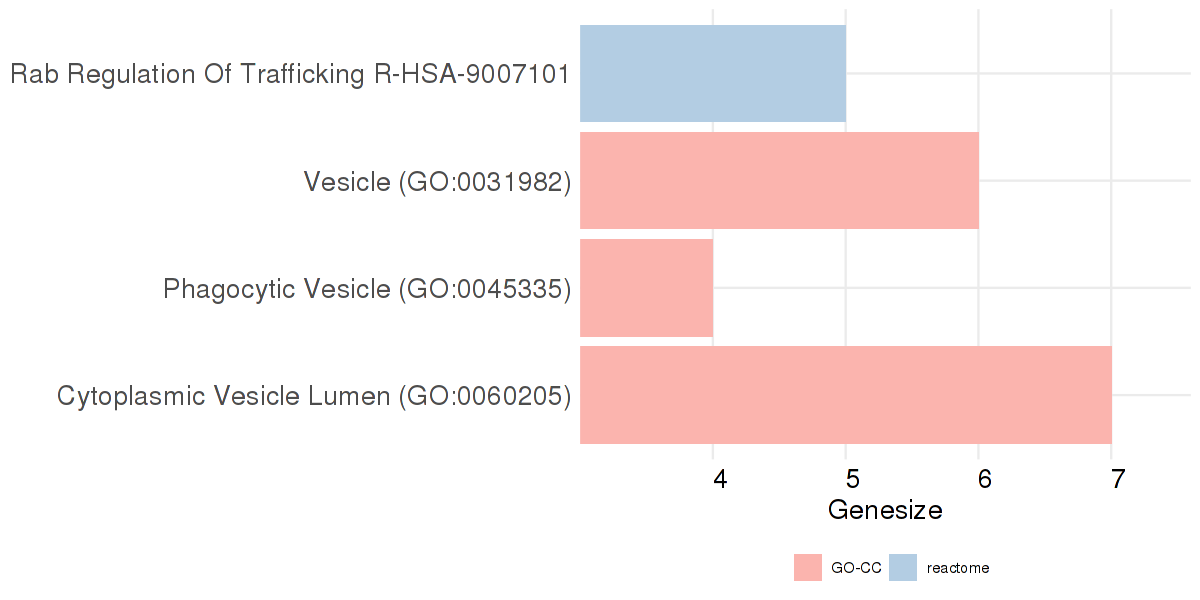

In [21]:
options(repr.plot.width=10, repr.plot.height=5)

require(forcats)

ggplot(enrich_result.p[grep("Rab Regulation Of Trafficking|Phagocytic Vesicle|Vesicle|Cytoplasmic Vesicle Lumen",enrich_result.p$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [18]:
enrich_result.n <- rbind(cbind(enrich_results.n[[1]],"group"="KEGG"),
                         cbind(enrich_results.n[[2]],"group"="reactome"),
                         cbind(enrich_results.n[[3]],"group"="GO-BP"),
                         cbind(enrich_results.n[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.n$Term

[1] "mRNA surveillance pathway"                                                                                           
 [2] "Homologous recombination"                                                                                            
 [3] "NF-kappa B signaling pathway"                                                                                        
 [4] "Spliceosome"                                                                                                         
 [5] "RIG-I-like receptor signaling pathway"                                                                               
 [6] "Processing Of Intronless Pre-mRNAs R-HSA-77595"                                                                      
 [7] "Processing Of Capped Intronless Pre-mRNA R-HSA-75067"                                                                
 [8] "Homology Directed Repair R-HSA-5693538"                                                                              
 [9] "SUMOylation Of DNA Damage Response And Repair Proteins R-HSA-3108214"                                                
[10] "DNA Double-Strand Break Repair R-HSA-5693532"                                                                        
[11] "Disease R-HSA-1643685"                                                                                               
[12] "mRNA 3-End Processing R-HSA-72187"                                                                                   
[13] "Processing Of Capped Intron-Containing Pre-mRNA R-HSA-72203"                                                         
[14] "Postmitotic Nuclear Pore Complex (NPC) Reformation R-HSA-9615933"                                                    
[15] "RNA Polymerase II Transcription Termination R-HSA-73856"                                                             
[16] "mRNA Splicing - Major Pathway R-HSA-72163"                                                                           
[17] "RNA Polymerase I Transcription Termination R-HSA-73863"                                                              
[18] "mRNA Splicing R-HSA-72172"                                                                                           
[19] "Cell Cycle Checkpoints R-HSA-69620"                                                                                  
[20] "Processing Of DNA Double-Strand Break Ends R-HSA-5693607"                                                            
[21] "Global Genome Nucleotide Excision Repair (GG-NER) R-HSA-5696399"                                                     
[22] "Formation Of Incision Complex In GG-NER R-HSA-5696395"                                                               
[23] "Transport Of Mature mRNA Derived From An Intronless Transcript R-HSA-159231"                                         
[24] "Transport Of Mature mRNAs Derived From Intronless Transcripts R-HSA-159234"                                          
[25] "DNA Repair R-HSA-73894"                                                                                              
[26] "Mitotic Anaphase R-HSA-68882"                                                                                        
[27] "Mitotic Metaphase And Anaphase R-HSA-2555396"                                                                        
[28] "RNA Polymerase I Transcription Initiation R-HSA-73762"                                                               
[29] "SUMO E3 Ligases SUMOylate Target Proteins R-HSA-3108232"                                                             
[30] "SUMOylation R-HSA-2990846"                                                                                           
[31] "Nucleotide Excision Repair R-HSA-5696398"                                                                            
[32] "HDR Thru Homologous Recombination (HRR) Or Single Strand Annealing (SSA) R-HSA-5693567"                              
[33] "tRNA Processing In Nucleus 

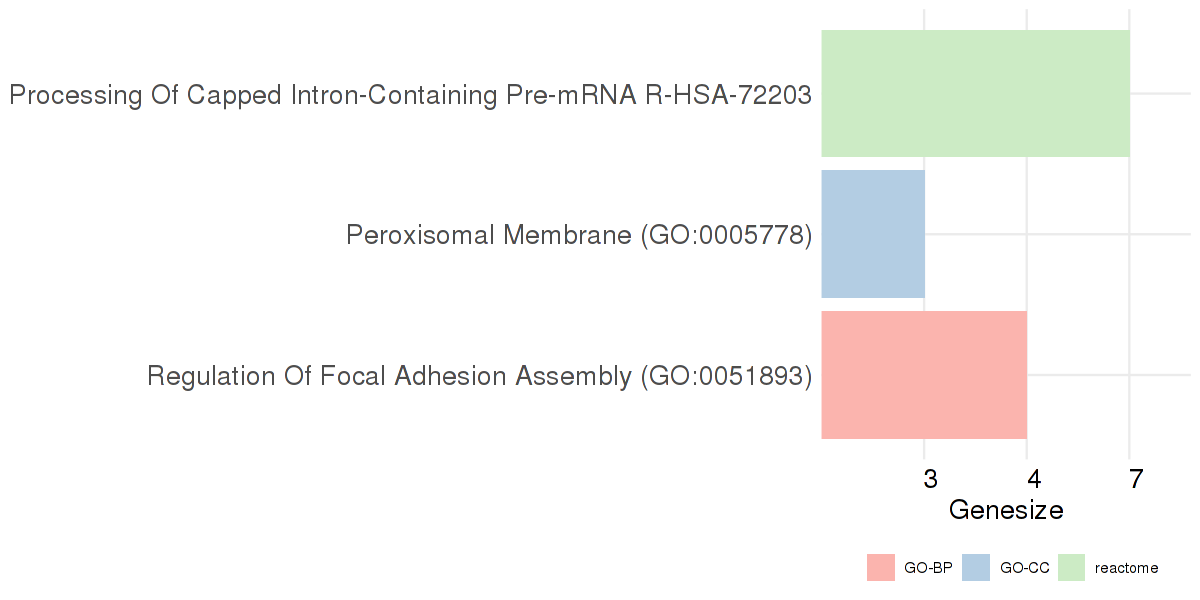

In [23]:
options(repr.plot.width=10, repr.plot.height=5)
require(forcats)

ggplot(enrich_result.n[grep("Processing Of Capped Intron-Containing Pre-mRNA|Regulation Of Focal Adhesion Assembly|Peroxisomal Membrane",enrich_result.n$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [36]:
require(nichenetr)
unique(unlist(str_split(enrich_result.p$Genes[grep("Rab Regulation Of Trafficking",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()
unique(unlist(str_split(enrich_result.p$Genes[grep("Phagocytic Vesicle|Vesicle|Cytoplasmic Vesicle Lumen",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()
unique(unlist(str_split(enrich_result.n$Genes[grep("Processing Of Capped Intron-Containing Pre-mRNA",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()
unique(unlist(str_split(enrich_result.n$Genes[grep("Regulation Of Focal Adhesion Assembly",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()
unique(unlist(str_split(enrich_result.n$Genes[grep("Peroxisomal Membrane",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()

RAB5B   DENND4B   DENND4C      GDI2     RAB9A 
  "Rab5b" "Dennd4b" "Dennd4c"    "Gdi2"    "Rab9"

VCP    PRDX4     GMFG    PGAM1     GDI2    ALDOA     PPIA    PDIA3 
   "Vcp"  "Prdx4"   "Gmfg"  "Pgam1"   "Gdi2"  "Aldoa"   "Ppia"  "Pdia3" 
   RAB9A     CALR   CLEC4E     CFL1      MSN   TAGLN2    MFGE8 
  "Rab9"   "Calr" "Clec4e"   "Cfl1"    "Msn" "Tagln2"  "Mfge8"

CPSF1    DDX46   NUP133   PABPN1    CSTF2   SNRPB2    WDR33 
 "Cpsf1"  "Ddx46" "Nup133" "Pabpn1"  "Cstf2" "Snrpb2"  "Wdr33"

ROCK2      VCL    PPM1F   MAP4K4 
 "Rock2"    "Vcl"  "Ppm1f" "Map4k4"

ACBD5    MAVS     CAT 
"Acbd5"  "Mavs"   "Cat"

In [59]:
enrich_result.p[grep("Rab Regulation Of Trafficking|Phagocytic Vesicle|Vesicle|Cytoplasmic Vesicle Lumen",enrich_result.p$Term),]
-log10(enrich_result.p$Adjusted.P.value[grep("Rab Regulation Of Trafficking|Phagocytic Vesicle|Vesicle|Cytoplasmic Vesicle Lumen",enrich_result.p$Term)])

enrich_result.n[grep("Processing Of Capped Intron-Containing Pre-mRNA|Regulation Of Focal Adhesion Assembly|Peroxisomal Membrane",enrich_result.n$Term),]
-log10(enrich_result.n$Adjusted.P.value[grep("Processing Of Capped Intron-Containing Pre-mRNA|Regulation Of Focal Adhesion Assembly|Peroxisomal Membrane",enrich_result.n$Term)])

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
30,Rab Regulation Of Trafficking R-HSA-9007101,5/122,2.085249e-03,0.0353606553,0,0,5.939569,36.66417,RAB5B;DENND4B;DENND4C;GDI2;RAB9A,reactome,5
107,Cytoplasmic Vesicle Lumen (GO:0060205),7/115,2.268305e-05,0.0003969534,0,0,9.141204,97.75505,VCP;PRDX4;GMFG;PGAM1;GDI2;ALDOA;PPIA,GO-CC,7
118,Phagocytic Vesicle (GO:0045335),4/100,6.367909e-03,0.0382114733,0,0,5.756702,29.10867,PDIA3;RAB9A;CALR;CLEC4E,GO-CC,4
119,Vesicle (GO:0031982),6/235,7.906383e-03,0.0425728324,0,0,3.646567,17.64969,CFL1;GDI2;MSN;TAGLN2;MFGE8;PPIA,GO-CC,6


[1] 1.451480 3.401260 1.417806 1.370867

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
13,Processing Of Capped Intron-Containing Pre-mRNA R-HSA-72203,7/242,0.0004530432,0.02473689,0,0,5.522441,42.52016,CPSF1;DDX46;NUP133;PABPN1;CSTF2;SNRPB2;WDR33,reactome,7
50,Regulation Of Focal Adhesion Assembly (GO:0051893),4/54,0.0002457384,0.03967323,0,0,14.559266,121.00560,ROCK2;VCL;PPM1F;MAP4K4,GO-BP,4
84,Peroxisomal Membrane (GO:0005778),3/53,0.0033499995,0.04899374,0,0,10.820182,61.66200,ACBD5;MAVS;CAT,GO-CC,3


[1] 1.606655 1.401502 1.309859

In [63]:
group1_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Rab Regulation Of Trafficking",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Lpl","Nae1","Hsd17b10","Mapk3")
group2_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Phagocytic Vesicle|Vesicle|Cytoplasmic Vesicle Lumen",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Fabp5","Tmsb4x","Impdh2","Aldoa","Ppia")
group3_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Processing Of Capped Intron-Containing Pre-mRNA",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Capza1","Cfl1","Msn","Lcp1")
group4_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Regulation Of Focal Adhesion Assembly",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Chtop","Cpsf1","Ddx46","Cstf2")
group5_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Peroxisomal Membrane",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Ppp1cc","Gsk3b","Rock2","Mapk1")

In [69]:
print(group1_genes)
print(group2_genes)
print(group3_genes)
print(group4_genes)
print(group5_genes)

    RAB5B   DENND4B   DENND4C      GDI2     RAB9A 
  "Rab5b" "Dennd4b" "Dennd4c"    "Gdi2"    "Rab9" 
     VCP    PRDX4     GMFG    PGAM1     GDI2    ALDOA     PPIA    PDIA3 
   "Vcp"  "Prdx4"   "Gmfg"  "Pgam1"   "Gdi2"  "Aldoa"   "Ppia"  "Pdia3" 
   RAB9A     CALR   CLEC4E     CFL1      MSN   TAGLN2    MFGE8 
  "Rab9"   "Calr" "Clec4e"   "Cfl1"    "Msn" "Tagln2"  "Mfge8" 
   CPSF1    DDX46   NUP133   PABPN1    CSTF2   SNRPB2    WDR33 
 "Cpsf1"  "Ddx46" "Nup133" "Pabpn1"  "Cstf2" "Snrpb2"  "Wdr33" 
   ROCK2      VCL    PPM1F   MAP4K4 
 "Rock2"    "Vcl"  "Ppm1f" "Map4k4" 
  ACBD5    MAVS     CAT 
"Acbd5"  "Mavs"   "Cat" 


In [61]:
require(xlsx)
write.xlsx(enrich_result.p, paste0(path,"/results/Figure7f_BVsiIft88_CD81IP_Lysate_pathwayP.xlsx"))
write.xlsx(enrich_result.n, paste0(path,"/results/Figure7f_BVsiIft88_CD81IP_Lysate_pathwayN.xlsx"))

Warning message:
“Removed 286 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 387 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_text_repel()`).”


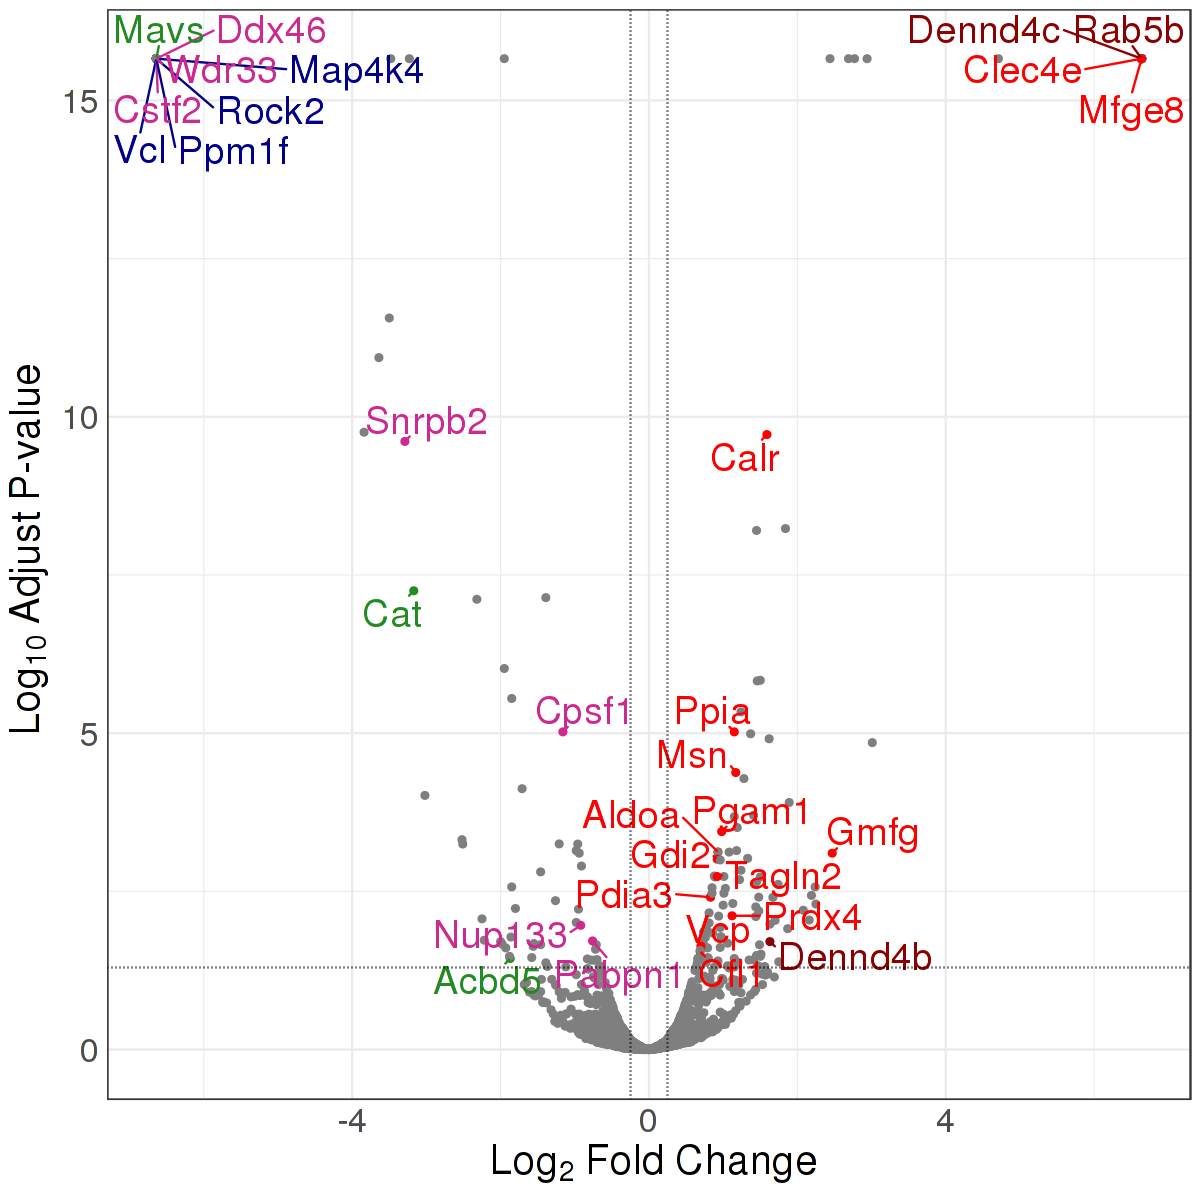

Warning message:
“Removed 286 rows containing missing values (`geom_point()`).”


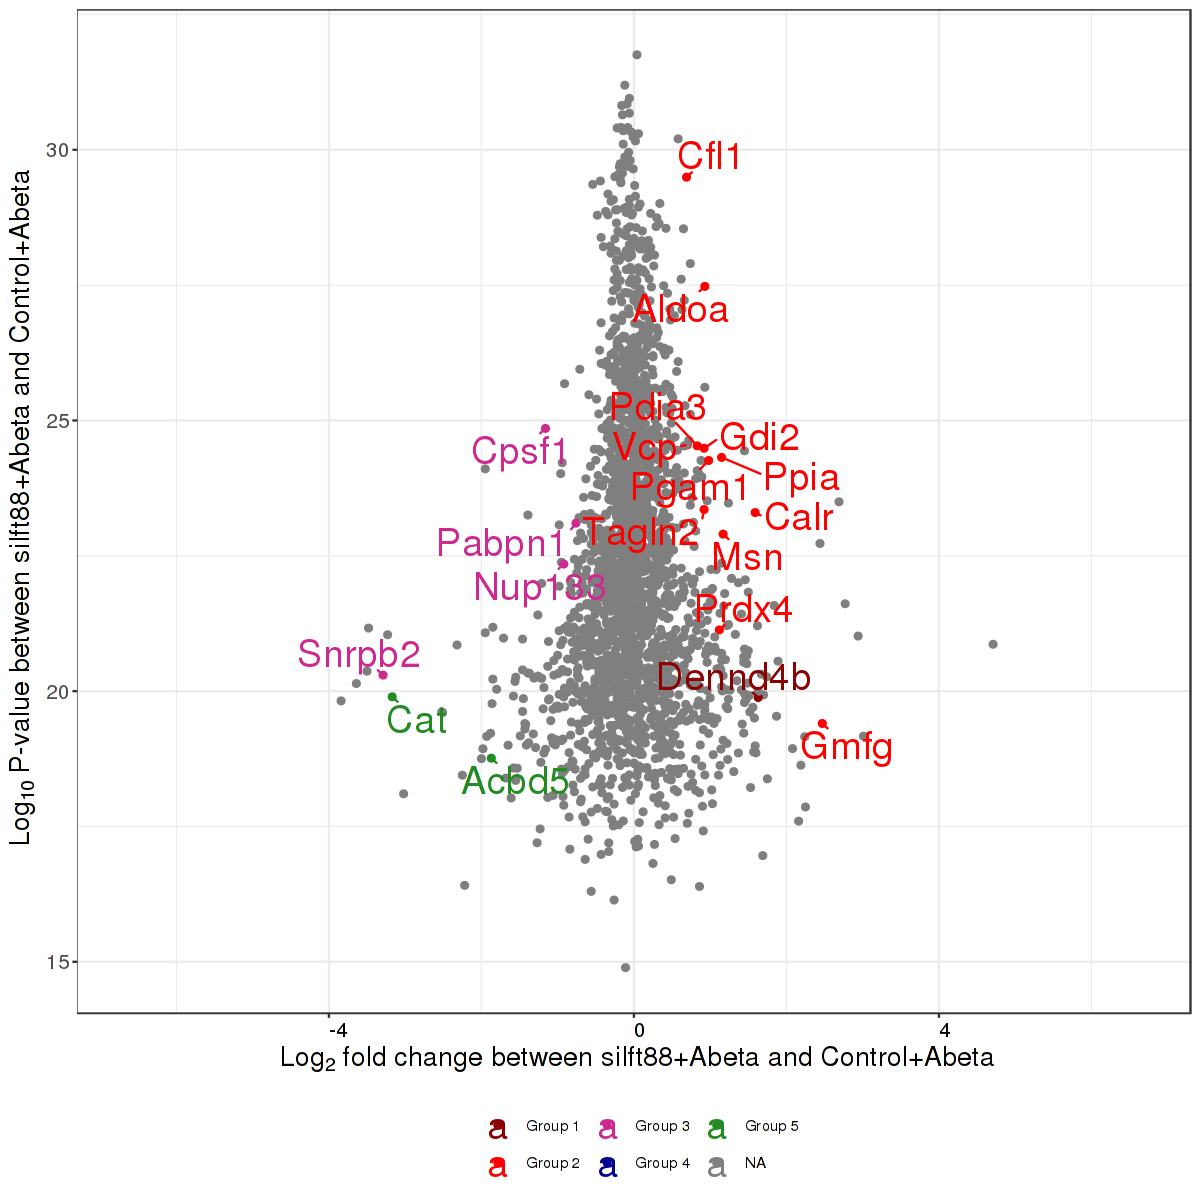

In [72]:

# options(repr.plot.width = 16, repr.plot.height = 16)
keyvals.colour <- c()
keyvals.colour <- ifelse(objDat$Gene.names %in% group1_genes, 'darkred', 'grey50')
keyvals.colour[objDat$Gene.names %in% group2_genes] <- "red"
keyvals.colour[objDat$Gene.names %in% group3_genes] <- "maroon3"
keyvals.colour[objDat$Gene.names %in% group4_genes] <- "blue4"
keyvals.colour[objDat$Gene.names %in% group5_genes] <- "forestgreen"
keyvals.colour[is.na(keyvals.colour)] <- 'grey70'

names(keyvals.colour)[keyvals.colour == 'grey70'] <- 'ns'
names(keyvals.colour)[keyvals.colour == 'darkred'] <- 'Group 1'
names(keyvals.colour)[keyvals.colour == 'red'] <- 'Group 2'
names(keyvals.colour)[keyvals.colour == 'maroon3'] <- 'Group 3'
names(keyvals.colour)[keyvals.colour == 'blue4'] <- 'Group 4'
names(keyvals.colour)[keyvals.colour == 'forestgreen'] <- 'Group 5'



objDat$group <- names(keyvals.colour)
options(repr.plot.width=10, repr.plot.height=10)
require(RColorBrewer)
require(ggrepel)

p1<-ggplot(objDat, aes(x=Abundance.Ratio.log2, y=-log10(Abundance.Ratio.P_Value), color =group)) + 
  geom_point() +
  geom_text_repel(data = objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes,group5_genes)  ,],
                  aes(label=Gene.names), 
                  size = 8,
                  fontface = "italic", 
                  arrow = arrow(length = unit(0.0001, "npc")),
                  #colour = objDat$group,
                  max.overlaps = 100, min.segment.length=0.1)+
  xlab(bquote(~Log[2]~ 'Fold Change'))+
  ylab(bquote(~Log[10]~ 'Adjust P-value'))+
  scale_colour_manual(values = c("darkred","red","maroon3","blue4","forestgreen","grey70"))+ 
        geom_vline(xintercept=c(-0.25, 0.25), col="black", linetype="dotted") +
        geom_hline(yintercept=-log10(0.05), col="black", linetype="dotted") +
  theme_bw()+
  theme(legend.position = "none",  
        axis.title = element_text(size = 24, face = "bold"), 
        plot.title = element_blank(), 
        axis.text = element_text(size = 20),  
        axis.line = element_blank(), 
        axis.ticks = element_blank(),
        # legend.key.size = unit(1, 'in'),
         legend.title = element_blank(),
        legend.text = element_text(size=20))   

print(p1)

p2<-ggplot(objDat, aes(x=Abundance.Ratio.log2, y=Abundance.Ratio.Weight, color =group)) + 
  geom_point() +
  geom_text_repel(data = objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes,group5_genes)  ,],
                  aes(label=Gene.names), 
                  size = 8,
                  fontface = "italic",
                  arrow = arrow(length = unit(0.0001, "npc")),
                  #colour = objDat$group,
                  max.overlaps = 100, min.segment.length=0.1)+
  xlab(bquote(~Log[2]~ 'fold change between siIft88+Abeta and Control+Abeta'))+
  ylab(bquote(~Log[10]~ 'P-value between siIft88+Abeta and Control+Abeta'))+
  scale_colour_manual(values = c("darkred","red","maroon3","blue4","forestgreen","grey70"))+ 
  
  theme_bw()+
  theme(
        axis.text.x = element_text(size = 12, hjust = 0, colour = "black"),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 16),
        legend.title = element_blank(),
        legend.background = element_blank()) + 
   theme(legend.position = "bottom")

print(p2)


ggsave(paste0(path,"/results/Figure4S_BVsiIft88_CD81IP_Lysate_Volcano plot22.pdf"), p1, width =7.5, height =7.5, units = "in", device = "pdf", dpi = 600)
#ggsave(paste0(path,"/results/BVsiIft88_CD81IP_Lysate_ScatterPlot plot22.pdf"), p2, width =7.5, height =7.5, units = "in", device = "pdf", dpi = 600)

In [14]:
colnames(objDat)
insAccs <- objDat %>% dplyr::filter(abs(Abundance.Ratio.log2) > 0.5 & Abundance.Ratio.P_Value < 0.01) %>% pull(Accession)

[1] "Gene.names"              "Accession"              
[3] "Abundance.Ratio.log2"    "Abundance.Ratio.P_Value"
[5] "Abundance.Ratio.Weight"  "group"

In [15]:
library("STRINGdb")
figure_network<-list()

string_db <- STRINGdb$new( version="11.5", species=10090, score_threshold=00, input_directory="~/R") #mouse : 10090, human : 9606
# map to STRING


example1_mapped = string_db$map( objDat[which(objDat$Accession %in% insAccs),], "Gene.names", removeUnmappedRows = TRUE )

example1_mapped_pval05 = string_db$add_diff_exp_color( subset(example1_mapped, Abundance.Ratio.P_Value<0.01), logFcColStr='Abundance.Ratio.log2')    
payload_id = string_db$post_payload( example1_mapped_pval05$STRING_id, colors=example1_mapped_pval05$color )

hits = example1_mapped_pval05$STRING_id




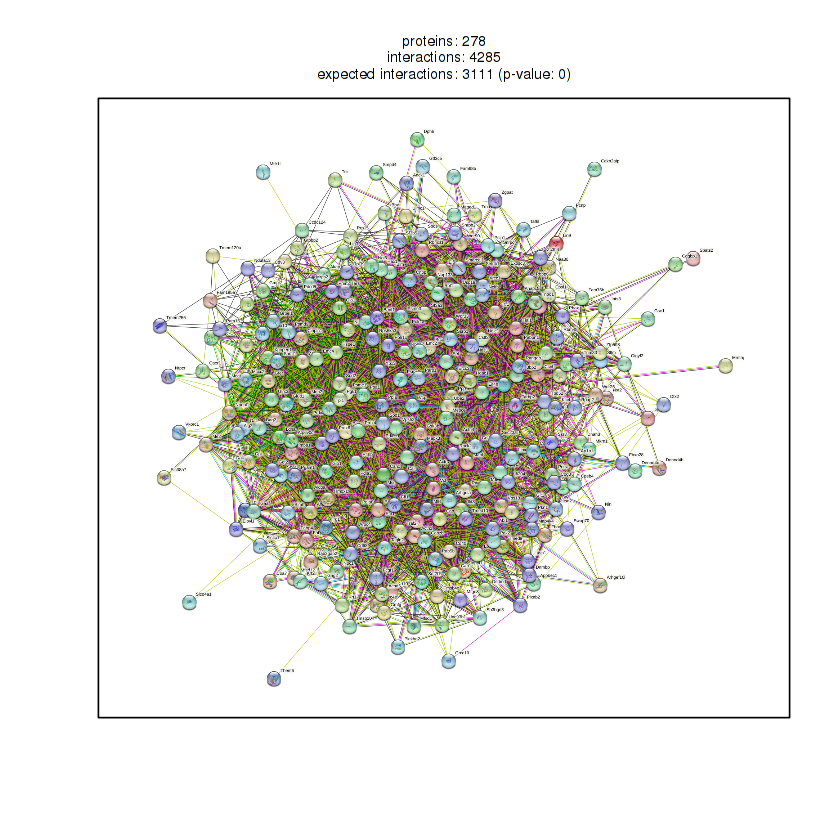

In [16]:
#pdf(paste0(path,"/results/BVsiIft88_Lysate_stringDB.pdf"), width=5, height=5, paper="letter")
#tiff(paste0(path,"/results/BVsiIft88_Lysate_stringDB.tiff"), width=5, height=5, units="in", pointsize=8, compression="lzw", bg="white", res=600)
string_db$plot_network(hits)
#dev.off()
# get clusters

In [17]:
clustersList = string_db$get_clusters(example1_mapped_pval05$STRING_id)
length(clustersList)

print(clustersList)

Warning message in graph.data.frame(PPIselected, FALSE):
“In `d' `NA' elements were replaced with string "NA"”


[1] 24

[[1]]
 [1] "10090.ENSMUSP00000001339" "10090.ENSMUSP00000002808"
 [3] "10090.ENSMUSP00000003642" "10090.ENSMUSP00000006053"
 [5] "10090.ENSMUSP00000006301" "10090.ENSMUSP00000006854"
 [7] "10090.ENSMUSP00000008445" "10090.ENSMUSP00000008477"
 [9] "10090.ENSMUSP00000015841" "10090.ENSMUSP00000017290"
[11] "10090.ENSMUSP00000019470" "10090.ENSMUSP00000020543"
[13] "10090.ENSMUSP00000021381" "10090.ENSMUSP00000022030"
[15] "10090.ENSMUSP00000034349" "10090.ENSMUSP00000099587"
[17] "10090.ENSMUSP00000126825" "10090.ENSMUSP00000078426"
[19] "10090.ENSMUSP00000062642" "10090.ENSMUSP00000101833"
[21] "10090.ENSMUSP00000029344" "10090.ENSMUSP00000048221"
[23] "10090.ENSMUSP00000030207" "10090.ENSMUSP00000029170"
[25] "10090.ENSMUSP00000033720" "10090.ENSMUSP00000057731"
[27] "10090.ENSMUSP00000134169" "10090.ENSMUSP00000070995"
[29] "10090.ENSMUSP00000063976" "10090.ENSMUSP00000025264"
[31] "10090.ENSMUSP00000122196" "10090.ENSMUSP00000126202"
[33] "10090.ENSMUSP00000083393" "10090.ENSMUSP0000

In [19]:
resList <- lapply(clustersList, function(cls) {

    res <- string_db$add_proteins_description(data.frame(STRING_id = cls))
    
    #clustersList[[1]] %>% length()
#print(res$preferred_name)
#paste0(c(group1_genes,group2_genes,group3_genes,group4_genes), collapse = "|")

    return(grep(paste0(c(group1_genes,group2_genes,group3_genes,group4_genes), collapse = "|"), res$preferred_name, value = TRUE))
  
})





In [20]:
print(resList)

[[1]]
[1] "Nae1"  "Ddx46" "Cstf2" "Cpsf1"

[[2]]
[1] "Aldoa" "Ppia" 

[[3]]
[1] "Lpl"    "Mapk3"  "Tmsb4x" "Msn"    "Cfl1"   "Lcp1"   "Capza1"

[[4]]
[1] "Fabp5"

[[5]]
character(0)

[[6]]
character(0)

[[7]]
character(0)

[[8]]
character(0)

[[9]]
character(0)

[[10]]
character(0)

[[11]]
character(0)

[[12]]
character(0)

[[13]]
character(0)

[[14]]
character(0)

[[15]]
character(0)

[[16]]
character(0)

[[17]]
character(0)

[[18]]
character(0)

[[19]]
character(0)

[[20]]
character(0)

[[21]]
character(0)

[[22]]
character(0)

[[23]]
character(0)

[[24]]
character(0)



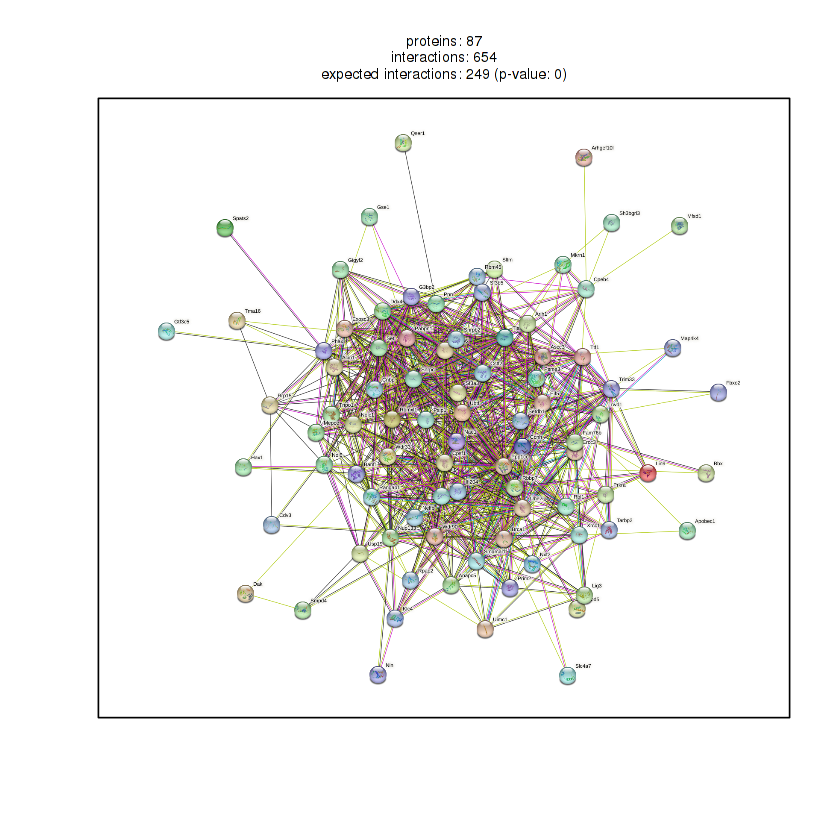

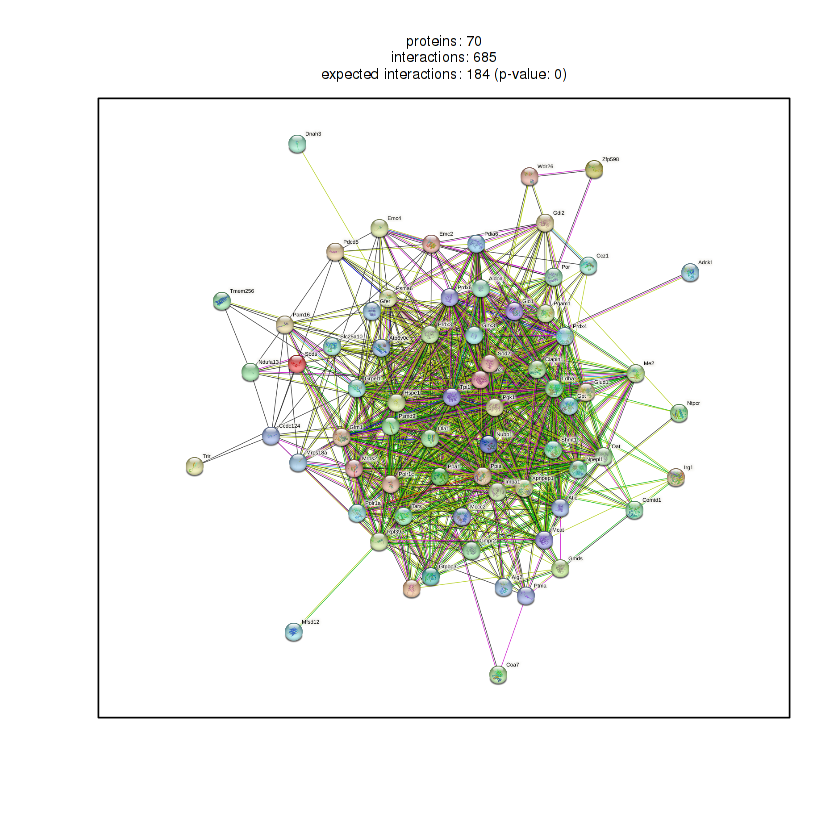

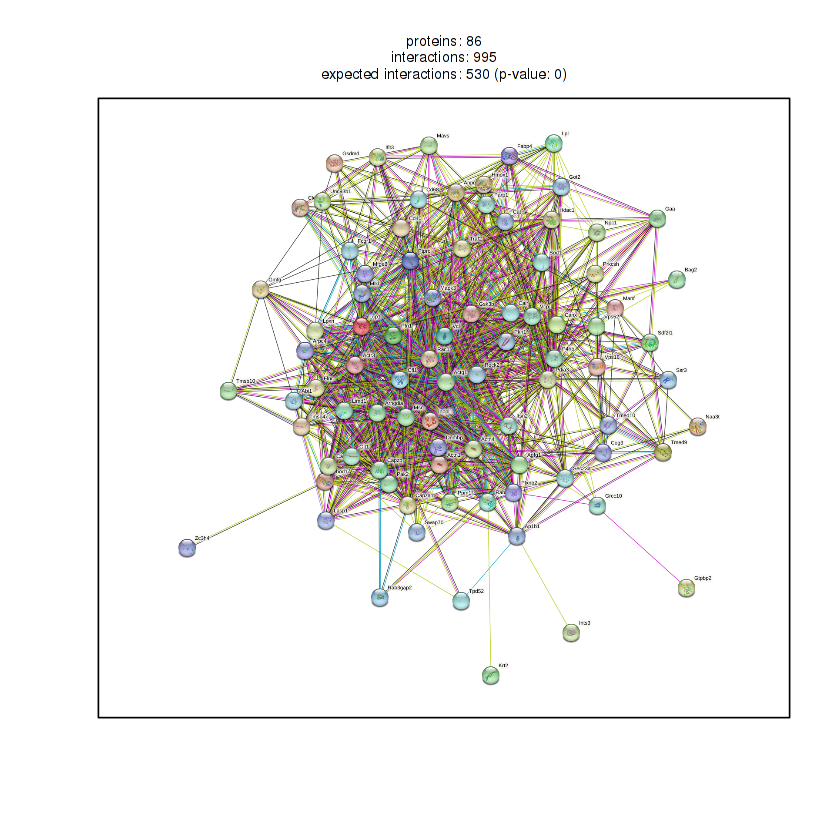

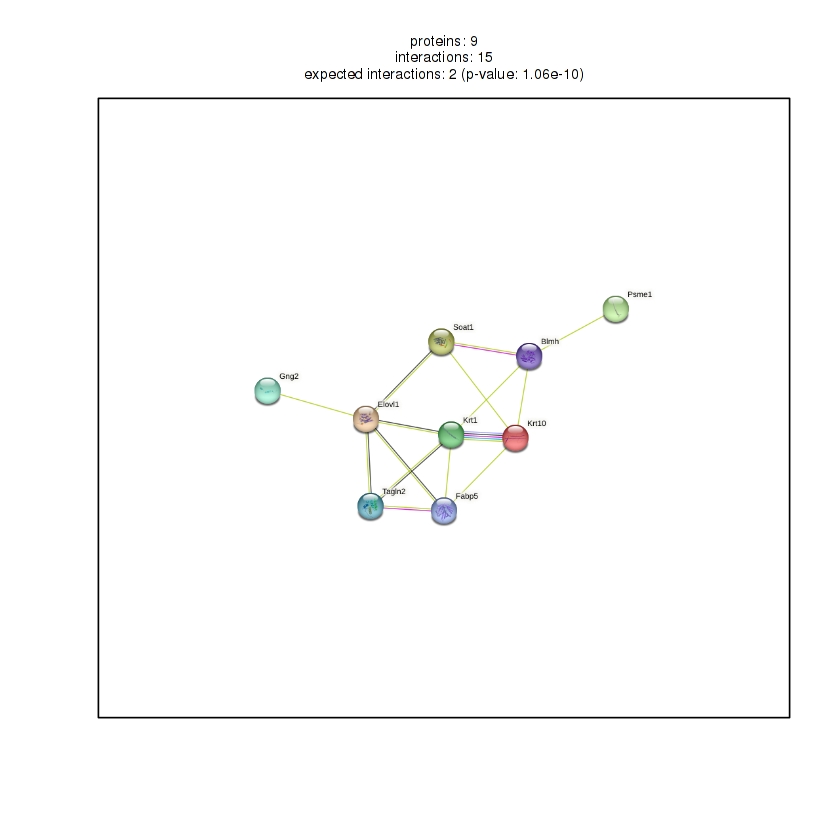

In [21]:
string_db$plot_network(clustersList[[1]])
string_db$plot_network(clustersList[[2]])
string_db$plot_network(clustersList[[3]])
string_db$plot_network(clustersList[[4]])